In [109]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [110]:
#Rutas
path = 'Data/'

In [194]:
european_football = pd.read_csv(path+'european_football.csv', delimiter=';', 
                                decimal=',')

In [195]:
european_football.head(5)

,Div,Mes,Probabilidad,LocalVisitante,JuegaEuropa,MundialOEurocopa,GanaFavorito
0,P1,1,1.099989,1,1,0,1
1,P1,5,1.099989,1,1,0,1
2,P1,8,1.149954,1,1,0,1
3,P1,9,1.149954,1,1,0,1
4,P1,10,1.149954,1,1,0,1


In [190]:
european_football.dtypes

Div                  object
Mes                   int64
Probabilidad        float64
LocalVisitante        int64
JuegaEuropa           int64
MundialOEurocopa      int64
GanaFavorito          int64
dtype: object

In [201]:
dummies = pd.get_dummies(european_football, columns=['Mes','Div','LocalVisitante','JuegaEuropa','MundialOEurocopa'])

In [202]:
dummies

,Probabilidad,GanaFavorito,Mes_1,Mes_2,Mes_3,Mes_4,Mes_5,Mes_6,Mes_7,Mes_8,...,Div_F1,Div_I1,Div_P1,Div_SP1,LocalVisitante_0,LocalVisitante_1,JuegaEuropa_0,JuegaEuropa_1,MundialOEurocopa_0,MundialOEurocopa_1
0,1.099989,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
1,1.099989,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,1,0
2,1.149954,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,1,0
3,1.149954,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
4,1.149954,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
5,1.149954,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
6,1.149954,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
7,1.149954,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
8,1.149954,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,1,0
9,1.149954,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0


In [203]:
columns = list(dummies.columns)

In [204]:
columns.remove('GanaFavorito')

In [205]:
columns

['Probabilidad',
 'Mes_1',
 'Mes_2',
 'Mes_3',
 'Mes_4',
 'Mes_5',
 'Mes_6',
 'Mes_7',
 'Mes_8',
 'Mes_9',
 'Mes_10',
 'Mes_11',
 'Mes_12',
 'Div_D1',
 'Div_E0',
 'Div_F1',
 'Div_I1',
 'Div_P1',
 'Div_SP1',
 'LocalVisitante_0',
 'LocalVisitante_1',
 'JuegaEuropa_0',
 'JuegaEuropa_1',
 'MundialOEurocopa_0',
 'MundialOEurocopa_1']

### K NEAREST NEIGHBORS

In [206]:
from sklearn.neighbors import KNeighborsClassifier

In [207]:
X = dummies[columns].values

In [208]:
y = dummies["GanaFavorito"] #Hace 0 y 1

In [209]:
clf = KNeighborsClassifier(n_neighbors=150)

In [210]:
clf.fit(X, y) #entrenamos

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=150, p=2,
           weights='uniform')

In [179]:
#clf.predict([[9,1,1,0]])

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [213]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=150, p=2,
           weights='uniform')

In [214]:
from sklearn.metrics import accuracy_score

In [215]:
accuracy_score(y_test, clf.predict(X_test))

0.57764177886576906

In [176]:
h = .01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.scatter(xx,yy, c=Z)
plt.xlabel('Cuota')
plt.ylabel('Mes')

ValueError: query data dimension must match training data dimension

In [ ]:
#Crossval score: para reorganizar y hacer el accuracy varias veces, así será más acertado el accuracy

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
a = cross_val_score(clf,X,y, cv=10, scoring='accuracy')

In [32]:
a.mean()

0.56374153655854087

(array([ 1.,  0.,  0.,  2.,  2.,  1.,  1.,  1.,  0.,  2.]),
 array([ 0.52154012,  0.5283142 ,  0.53508828,  0.54186235,  0.54863643,
         0.55541051,  0.56218459,  0.56895867,  0.57573275,  0.58250683,
         0.5892809 ]),
 <a list of 10 Patch objects>)

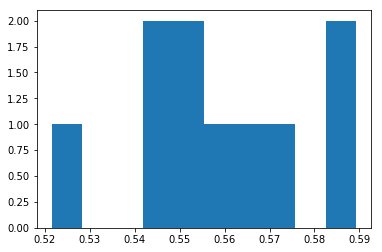

In [74]:
plt.hist(a)

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
clf2 = GridSearchCV(estimator = KNeighborsClassifier(n_neighbors=1), param_grid={'n_neighbors':np.arange(1,50)})

In [78]:
clf2.fit(X,y)

KeyboardInterrupt: 

In [79]:
clf2.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'